In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\\Users\\krishna\\AppData\\Local\\Temp\\Temp1_students-performance-in-exams.zip\\StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df1=pd.DataFrame(df,columns=['reading score','writing score','math score'])
df1

,reading score,writing score,math score
0,72,74,72
1,90,88,69
2,95,93,90
3,57,44,47
4,78,75,76
...,...,...,...
995,99,95,88
996,55,55,62
997,71,65,59
998,78,77,68


In [4]:
df1.isnull().any()

reading score    False
writing score    False
math score       False
dtype: bool

In [5]:
x=df1.iloc[:,:-1].values
x


array([[72, 74],
       [90, 88],
       [95, 93],
       ...,
       [71, 65],
       [78, 77],
       [86, 86]], dtype=int64)

In [8]:
y=df1.iloc[:,-1].values

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [13]:
df=pd.DataFrame({'actual':y_test,'predicted':y_pred})
df

,actual,predicted
0,62,69.317322
1,87,69.510016
2,40,47.216599
3,77,60.644061
4,69,73.621769
...,...,...
245,71,68.482179
246,63,59.326980
247,90,88.366312
248,55,63.278222


In [22]:
new_pred=lr.predict([[90,89]])
new_pred

array([84.25455908])

In [20]:
lr.intercept_

6.420090400830468

In [21]:
lr.coef_

array([0.6424488 , 0.22487727])

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from numpy import sqrt
rmse=sqrt(mean_squared_error(y_pred,y_test))
rmse

9.166571431377662

In [29]:
mae=mean_absolute_error(y_pred,y_test)
mae

7.606139102118473

In [26]:
from sklearn.metrics import r2_score
r2score=r2_score(y_pred,y_test)
r2score*100

46.85823891493297

ValueError: x and y must be the same size

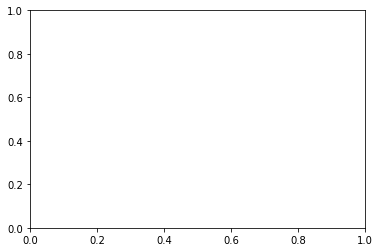

In [23]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_pred)
plt.show()